### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
## plot setting
plt.rcParams['font.family'] = 'Meiryo'
plt.style.use('ggplot')

### Read Dataset

In [3]:
df = pd.read_csv('https://www.statlearning.com/s/Credit.csv')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


> DataFrame前処理

In [6]:
object_col_list = df.select_dtypes(include=object).columns
for col in object_col_list:
    print('-----------------')
    print('column: ', col)
    print('Unique values: ', df[col].unique())

-----------------
column:  Own
Unique values:  ['No' 'Yes']
-----------------
column:  Student
Unique values:  ['No' 'Yes']
-----------------
column:  Married
Unique values:  ['Yes' 'No']
-----------------
column:  Region
Unique values:  ['South' 'West' 'East']


In [7]:
### 変数変換: Studentをyes→1 else 0
student_dict = {'Yes': 1, 'No': 0}
df = df.replace({'Student': student_dict})
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,0,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,1,Yes,West,903
2,104.593,7075,514,4,71,11,No,0,No,West,580
3,148.924,9504,681,3,36,11,Yes,0,No,West,964
4,55.882,4897,357,2,68,16,No,0,Yes,South,331


In [8]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Student,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.100000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.300376,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,0.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,0.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1999.000000


In [9]:
def standardize_col(col):
    mu = np.mean(col)
    sd = np.std(col,ddof=1)
    return (col - mu)/sd, mu, sd

In [10]:
col_list = ['Balance','Income','Limit','Rating']
df_standardized, df_mean, df_std = standardize_col(df.loc[:,col_list])
df_standardized['Student'] = df['Student']

df_standardized.describe()

,Balance,Income,Limit,Rating,Student
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,6.661338e-18,-8.881784e-18,-1.643130e-16,4.440892e-18,0.100000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.300376
min,-1.131060e+00,-9.892355e-01,-1.681224e+00,-1.692948e+00,0.000000
25%,-9.815254e-01,-6.869665e-01,-7.138033e-01,-6.960129e-01,0.000000
50%,-1.316233e-01,-3.434142e-01,-4.899924e-02,-7.070648e-02,0.000000
75%,7.460106e-01,3.476271e-01,4.926569e-01,5.319790e-01,0.000000
max,3.216871e+00,4.012428e+00,3.976001e+00,4.052761e+00,1.000000


### Ridge Regression

In [11]:
def reg_ridge(y, X, penalty):
    k = X.shape[1]
    lh_mat = X.T @ X + penalty * np.identity(k)
    rh_mat = X.T @ y

    return np.linalg.solve(lh_mat, rh_mat)

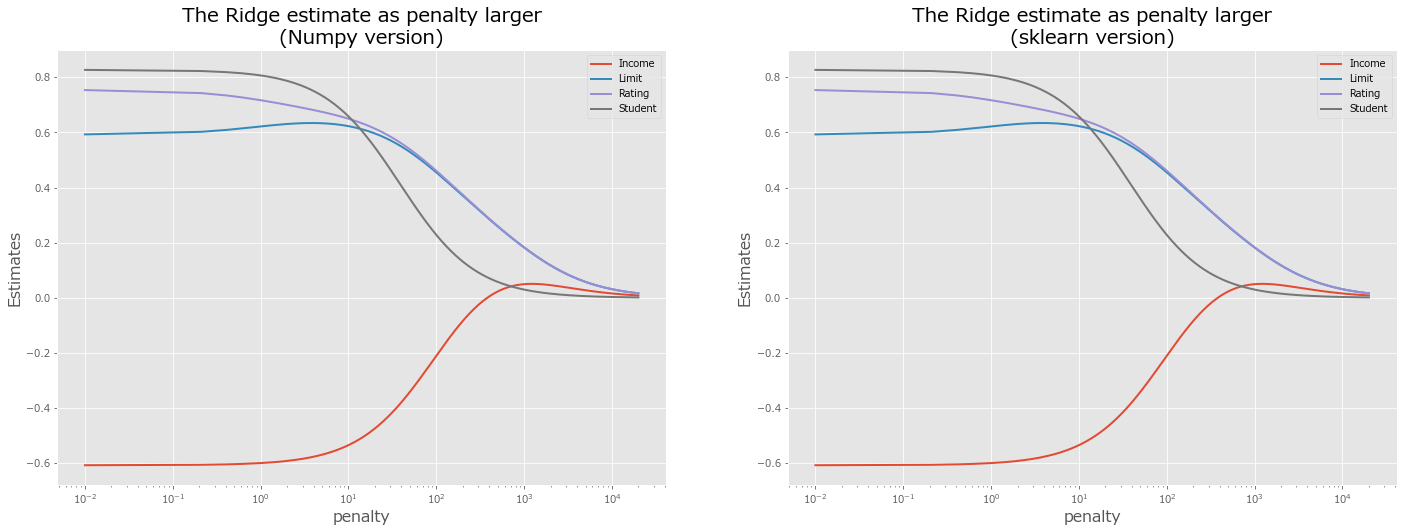

In [12]:
## regression data
y, X = df_standardized['Balance'].values, df_standardized.iloc[:,1:].values

## simulation params
iter_num=100000
penalty_range = np.linspace(1e-02, 2e4, iter_num)

## simulation
result = np.empty((iter_num, 4))
result_sklearn = np.empty((iter_num, 4))

for array_index, _penalty in enumerate(penalty_range):
    ## numpy version
    res = reg_ridge(y, X, _penalty)
    result[array_index,:] = res

    ## sklearn version
    clf = Ridge(alpha=_penalty,fit_intercept=False)
    clf.fit(X, y)
    result_sklearn[array_index,:] = clf.coef_

## plot
fig,axs = plt.subplots(1, 2, figsize=(12*2,8))
axs[0].plot(penalty_range,result,label = ['Income','Limit','Rating', 'Student'],lw=2)
axs[1].plot(penalty_range,result_sklearn,label = ['Income','Limit','Rating', 'Student'],lw=2)

axs[0].set_title('The Ridge estimate as penalty larger\n(Numpy version)', fontsize=20)
axs[1].set_title('The Ridge estimate as penalty larger\n(sklearn version)', fontsize=20)

for ax in axs:
    ax.set_xlabel('penalty', fontsize=16)
    ax.set_ylabel('Estimates', fontsize=16)
    ax.set_xscale('log')
    ax.legend();
